### About Dataset

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Update (03/05/2021)
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

### Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics

### Download Link

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm




In [6]:
df = pd.read_csv("creditcard.csv")

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
#Check missing values 

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Check types

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
#We can see that this dataframe is very unbalanced, 
#only 0,17% is considered Fraud

print(df.Class.value_counts([1])*100)

0    99.827251
1     0.172749
Name: Class, dtype: float64


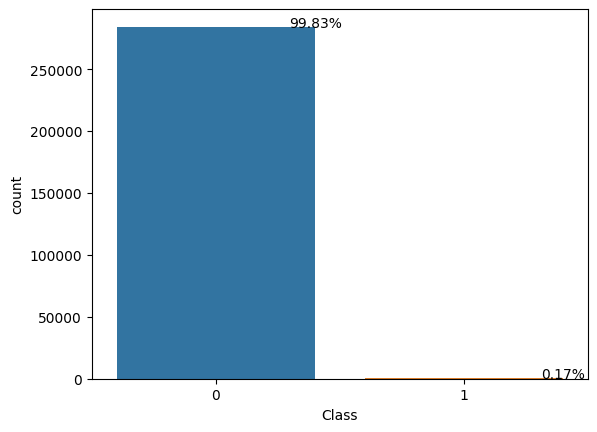

In [10]:
ax = sns.countplot(x='Class',data=df)
total = float(len(df))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
   
plt.show()

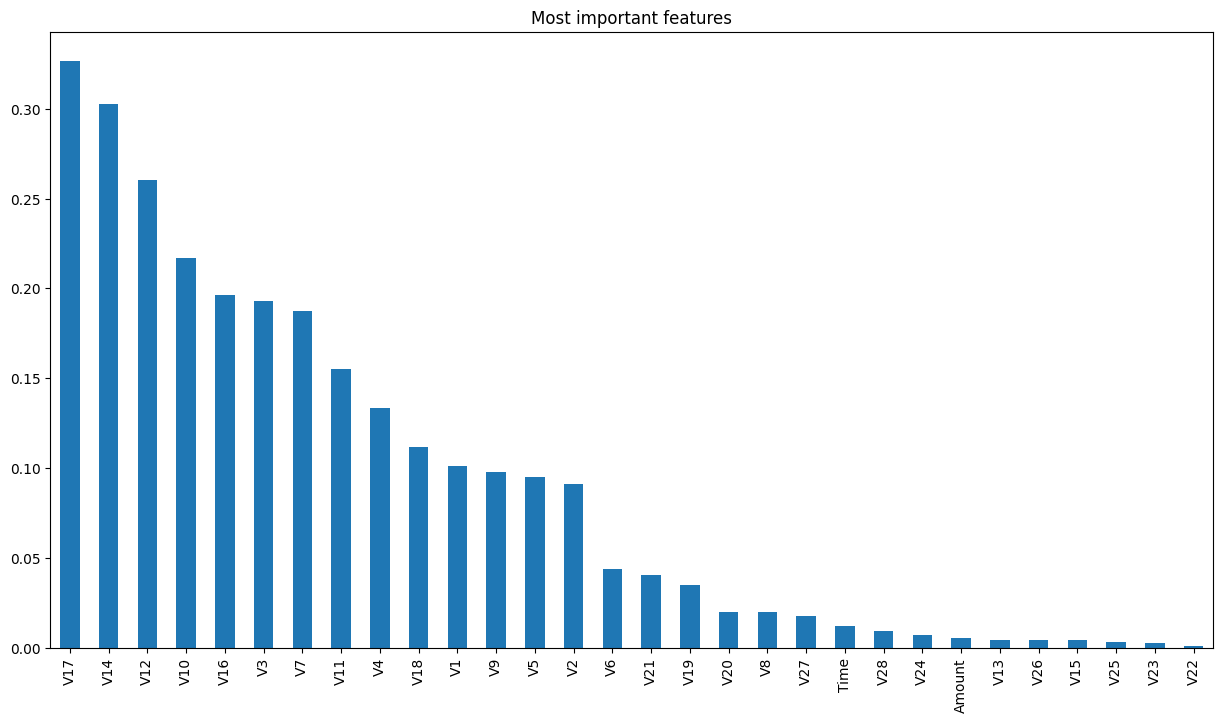

In [11]:
#Let's check the correlation between variables and Fraud 

plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values(ascending=False).plot(kind='bar', title='Most important features')

plt.show()

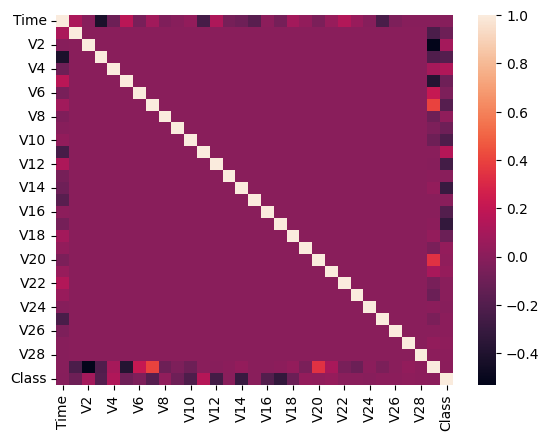

In [12]:
sns.heatmap(df.corr(),annot=False)
plt.show()

Here we have the corraltion between our variables with the target. Let's check how is the distribution of those variables that are highly correlated to see if we can get any insights from it. 

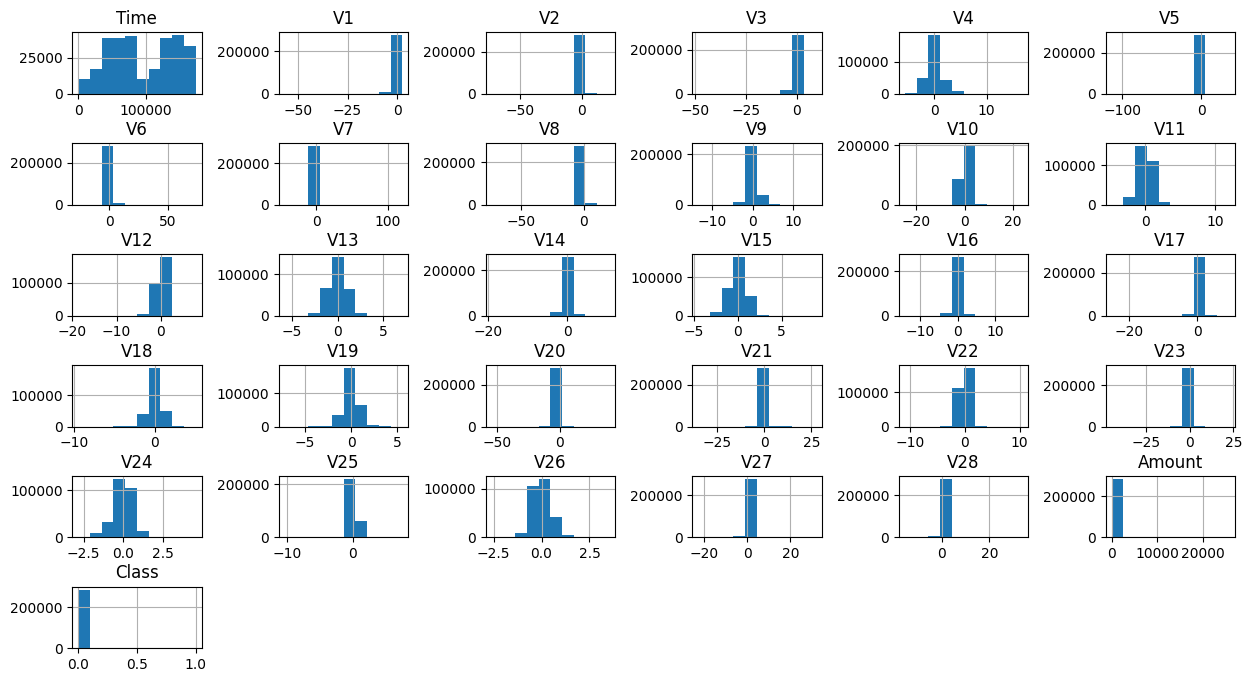

In [13]:
df.hist()
plt.gcf().set_size_inches(15,8)
plt.subplots_adjust(hspace = 0.8, wspace=0.6)


The can see that almost none of our variables are Binary. 

The relation between my variable and my target should be preferibly linear. But what if we have a linear relation that works only until a certain point? For example:

We could assume that age and income have a linear relation, but after a certain age that relation is broken. The assume that the income would increase until retirement and it would drop after retirement. 

Let's see if we can find those relations in this dataframe 



In [14]:
df_1 = df.loc[:, ["V24", "Class"]]

df_1 = df_1.sort_values(by = "Class", ascending=False)

df_1

,V24,Class
42635,0.625250,1
135718,-0.567608,1
10568,-1.209264,1
215132,-2.028024,1
144104,-0.743165,1
...,...,...
95068,-0.925287,0
95069,0.394785,0
95070,0.196057,0
95071,-0.021375,0


In [15]:
#Do a describe where the values from V24 have a Class = 1

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
#cross = pd.crosstab(index = df["Class"], columns = df.iloc[:,1:29])

#cross.index = ["Fraud", "Accepted"]

#cross

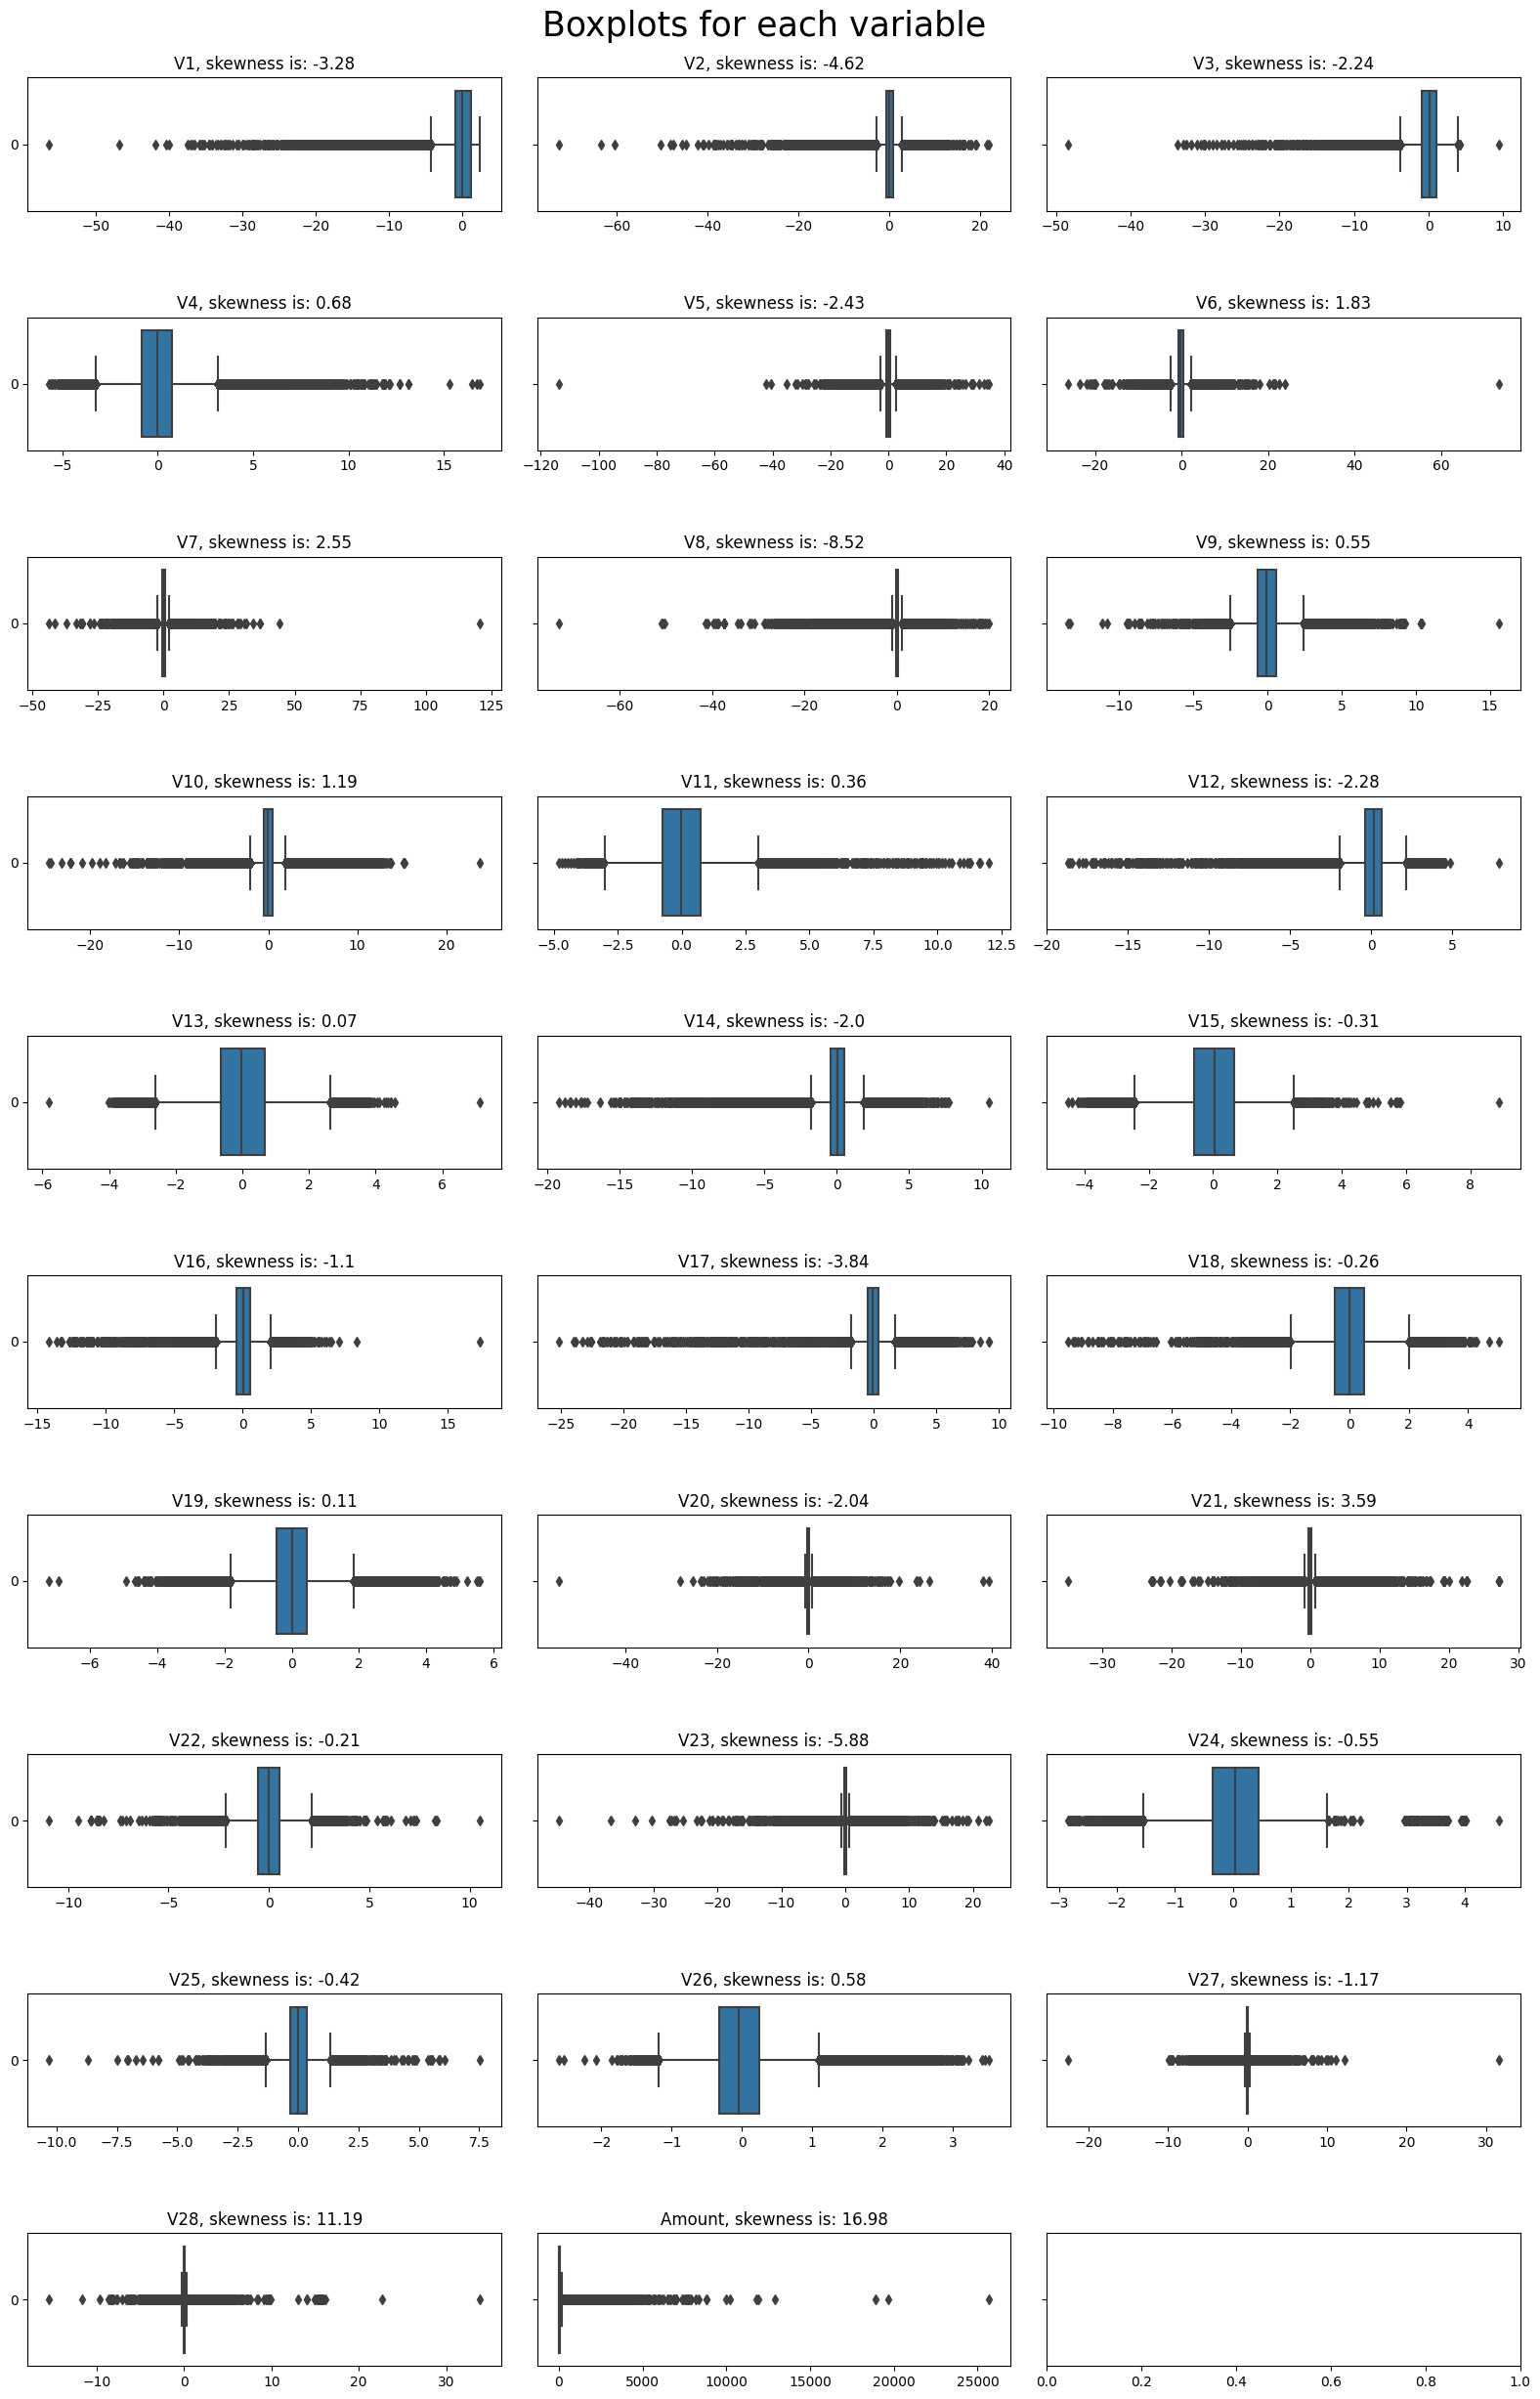

In [17]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle, size=25)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.subplots_adjust(hspace = 0.8)


#plt.suptitle('Fix suptitle location')
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()






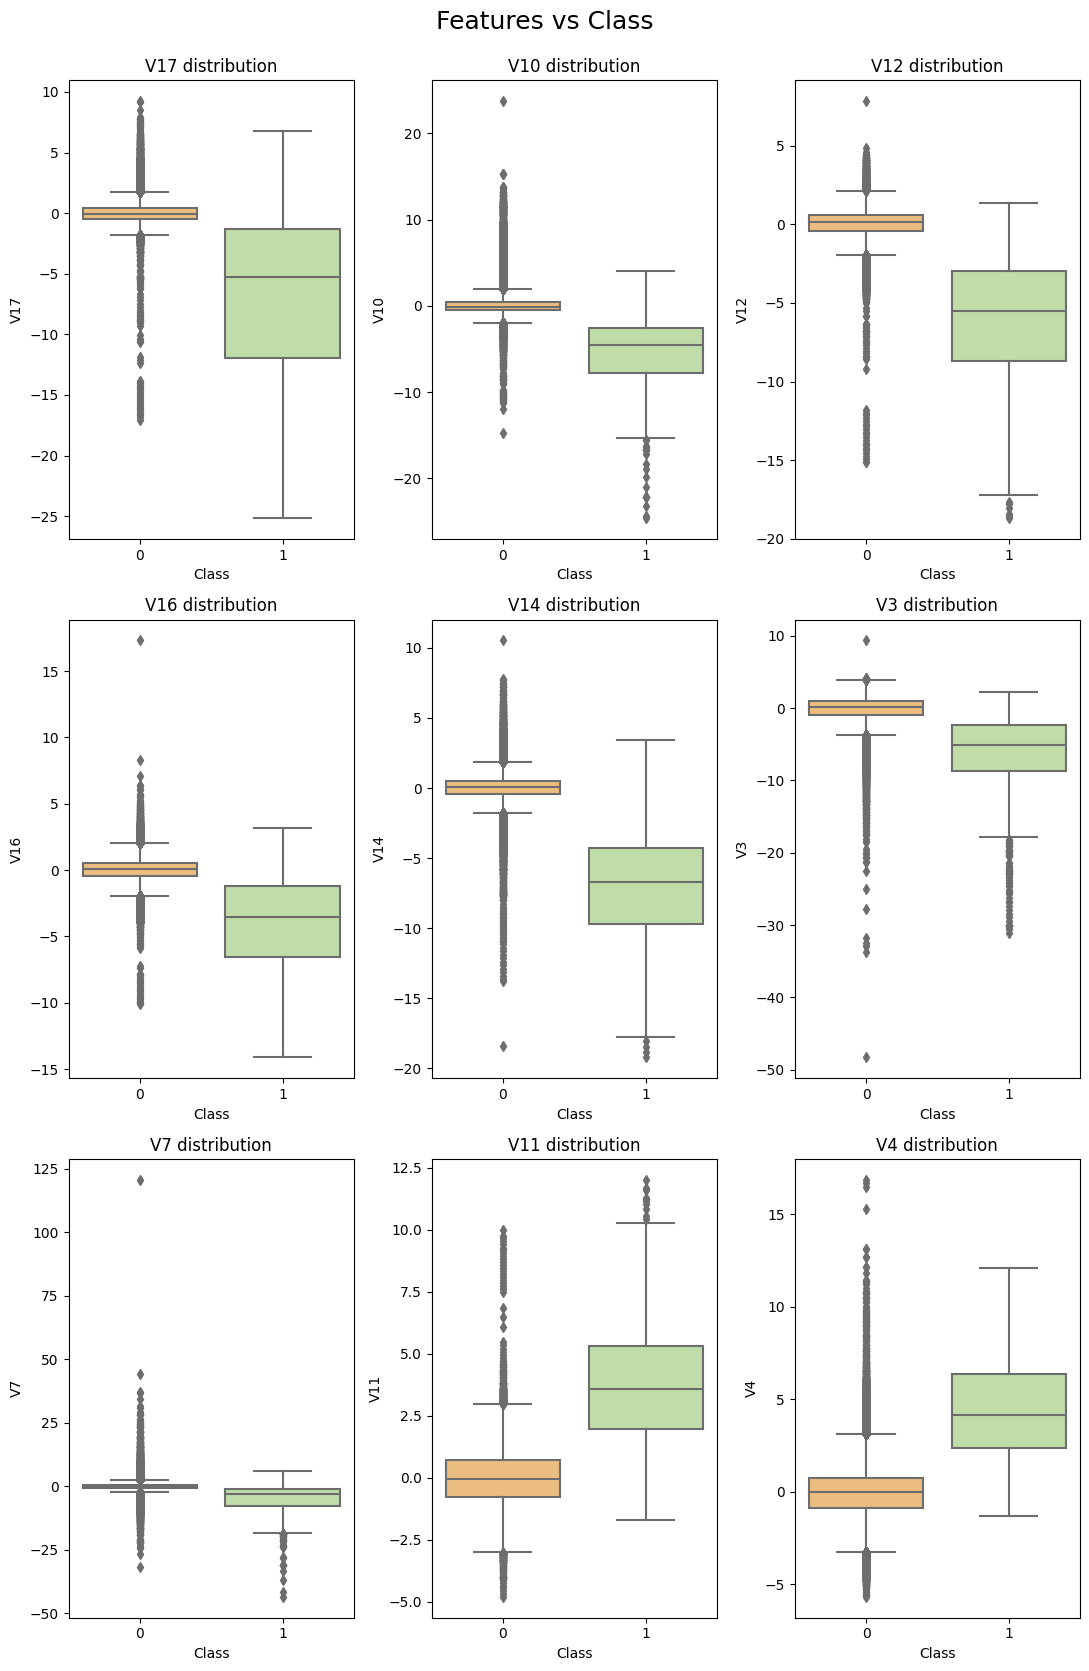

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V17', palette='Spectral')
axes[0,0].set_title("V17 distribution");

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V10', palette='Spectral')
axes[0,1].set_title("V10 distribution");

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V12', palette='Spectral')
axes[0,2].set_title("V12 distribution");

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V16', palette='Spectral')
axes[1,0].set_title("V16 distribution");

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V14', palette='Spectral')
axes[1,1].set_title("V14 distribution");

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V3', palette='Spectral')
axes[1,2].set_title("V3 distribution");

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V7', palette='Spectral')
axes[2,0].set_title("V7 distribution");

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V11', palette='Spectral')
axes[2,1].set_title("V11 distribution");

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V4', palette='Spectral')
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

There is a clear problem with outliers in this dataset, we must pick a method to detect and remove those. 

In [19]:
# Let's peak all features with correlation 0.15 and morec = 

c = df.corr()['Class'][:-1].abs() > 0.13

print (c)

Time      False
V1        False
V2        False
V3         True
V4         True
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11        True
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool


Now lets check the distribution of those classes


/tmp/ipykernel_5425/2510714999.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][df.Class == 1], bins=50, color='r')
/tmp/ipykernel_5425/2510714999.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][df.Class == 0], bins=50, color='g')
/tmp/ipykernel_5425/2510714999.py:8: UserW

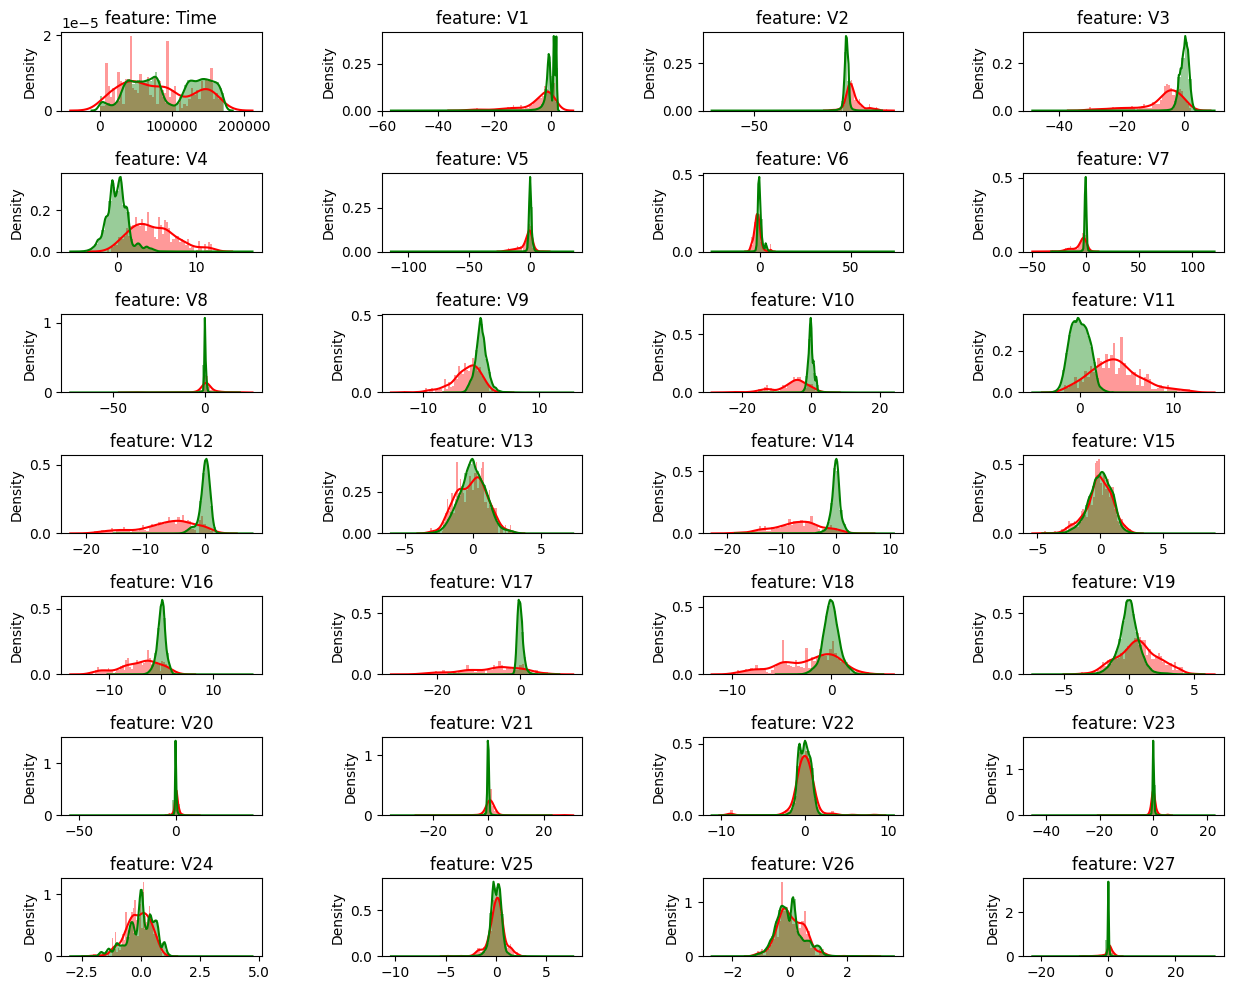

In [20]:
import seaborn as sns
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(7, 4)
plt.figure(figsize=(15, 12))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col), loc='center')
    
plt.subplots_adjust(hspace = 0.8, wspace=0.6)
plt.show()

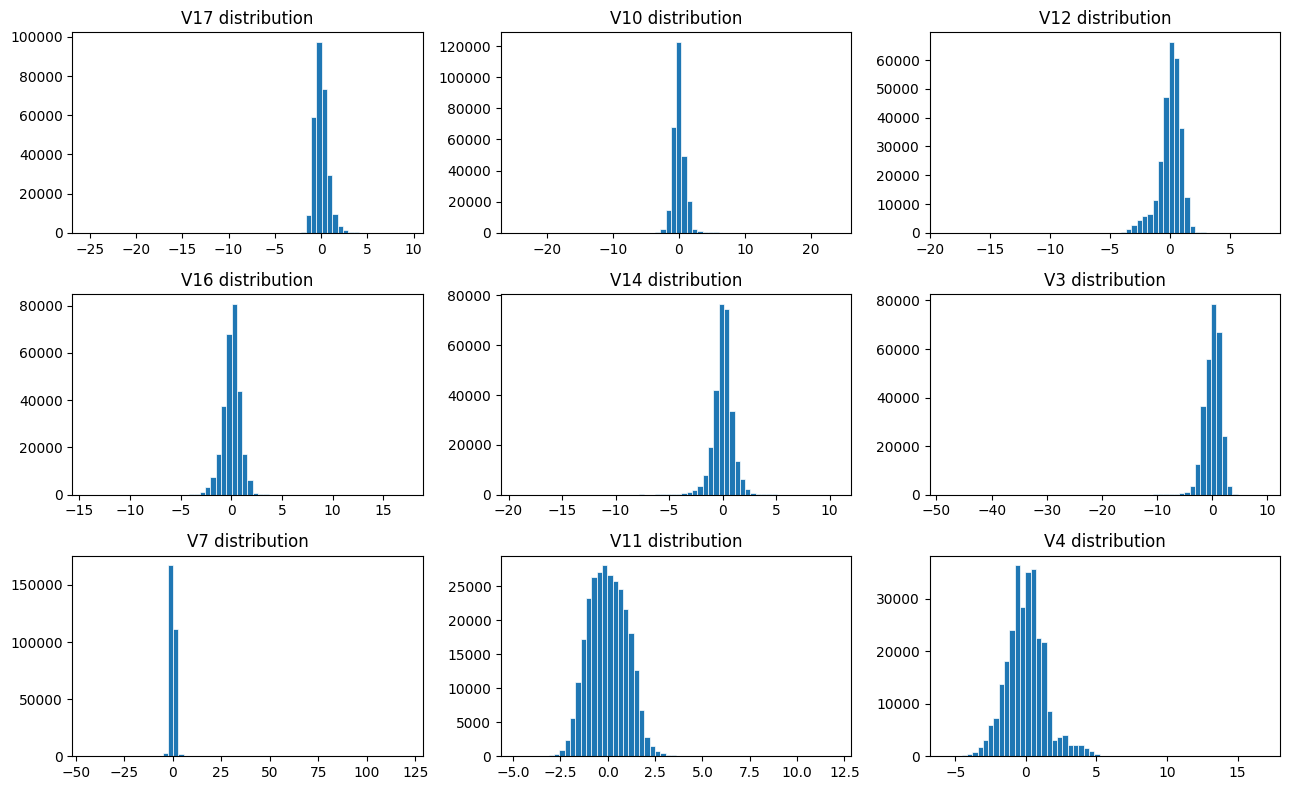

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

Tukey's IQR method
Tukey’s (1977) technique is used to detect outliers in univariate distributions for symmetric as well as in slightly skewed data sets. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

In [22]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_indices = []
    
    # iterating over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # appending the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detecting outliers
Outliers_IQR = detect_outliers(df,2,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [23]:
len(Outliers_IQR)

47116

In [24]:
df_out

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237686,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
237687,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
237688,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
237689,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


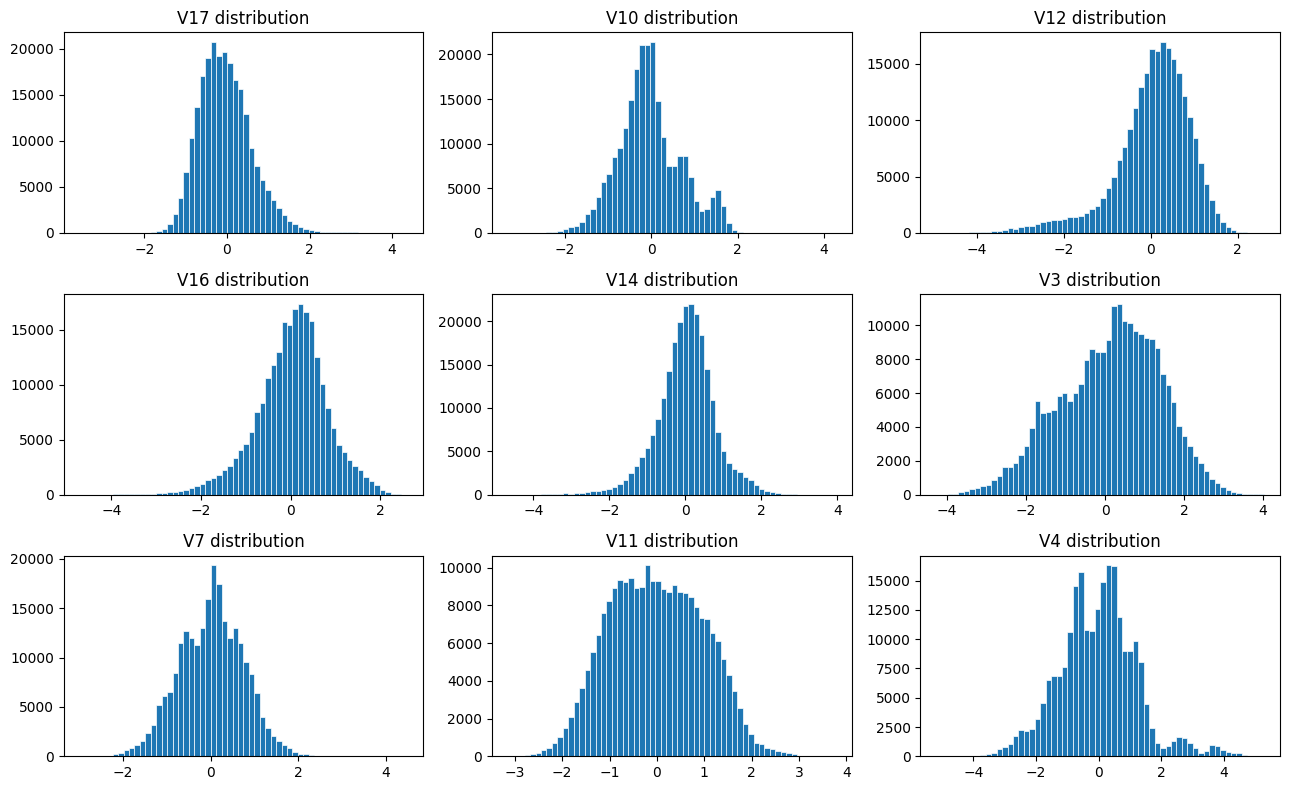

In [25]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df_out['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [26]:
# Let's check if we didn't drop too many important information accidentally
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Class'] == 1]))

The amount of frauds in df before dropping outliers:  492


In [27]:
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['Class'] == 1]))

The amount of frauds in df after dropping outliers:  43


It looks like outliers are very similar to fraud values and we dropped most of them!

Let's create a new df with dropped outliers only.

In [28]:
Outliers_df2 = df.loc[df.index[Outliers_IQR]]

len(Outliers_df2)

47116

In [29]:
Outliers_df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
140,87.0,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
146,92.0,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275573,166610.0,-2.796570,-1.602426,0.553124,-0.972816,-0.090899,0.423694,0.037604,0.500683,-1.163213,...,-0.766574,-1.794549,-0.536869,0.233628,0.208626,-0.435249,0.509353,-0.512349,283.20,0
277296,167577.0,-0.514141,0.949264,-1.164256,-0.687624,0.784550,1.162172,1.753924,-0.052698,0.015033,...,-0.209018,-0.107877,0.148562,-0.421933,-0.589293,0.238553,-0.676694,-0.584556,195.40,0
277581,167728.0,-0.112954,0.944074,-2.352370,0.944593,0.767084,-0.491613,1.898752,0.062521,-1.224329,...,0.714246,1.895837,0.441559,0.729273,-1.048663,-0.415093,0.407531,0.354169,197.72,0
280989,169868.0,-0.303032,0.515443,-2.395964,-0.052680,0.454179,-1.607054,2.039611,-0.188682,-0.446324,...,0.671690,1.721186,0.444797,-0.004811,-1.012256,-0.141775,0.369032,0.314705,214.20,0


Build the model 

In [30]:
# Train/Test split

x = Outliers_df2.drop('Class',axis=1)
y = Outliers_df2['Class']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=42)

In [31]:
x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial())
reg_log = reg_log.fit()

print(reg_log.summary())
print()
print("Parameters: ", reg_log.params)
print("Odds Ratio")
print(np.exp(reg_log.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                23558
Model:                            GLM   Df Residuals:                    23527
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -344.04
Date:                Tue, 18 Apr 2023   Deviance:                       688.08
Time:                        20:40:00   Pearson chi2:                 1.08e+05
No. Iterations:                    11   Pseudo R-squ. (CS):            0.07709
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7081      0.424    -15.839      0.0

# Evaluating the Model 

In [32]:
#Predict the values 
y_pred_train = reg_log.predict(x_train_)
y_pred_test = reg_log.predict(x_test_)

#Calculating the ROC and Gini - Training 
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)


print("AUC - Train: %f" % roc_auc_train)
print("Gini - Train: ", round(2*roc_auc_train-1,2))
print()

#Calculating the ROC and Gini - Test 
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Test: %f" % roc_auc_test)
print("Gini - Test: ", round(2*roc_auc_test-1,2))
print()



AUC - Train: 0.989121
Gini - Train:  0.98

AUC - Test: 0.988452
Gini - Test:  0.98



In [33]:
#What is the best cutting point to approve credit or to claim it is a fraud?

# The point where the True Positive Rate and the False Positive Rate cross
# Where the TPR is high and the FPR is low 

i = np.arange(len(tpr_train))
roc_train = pd.DataFrame({"fpr" : pd.Series(fpr_train, index=i)
                         ,"tpr" : pd.Series(tpr_train, index=i)
                         ,"1-fpr" : pd.Series(1-fpr_train, index=i)
                         ,"tf" : pd.Series(tpr_train - (1-fpr_train), index=i)
                         ,"thresholds" : pd.Series(thresholds_train, index=i)})

print(round(roc_train.loc[(roc_train.tf-0).abs().argsort()[:1]],3))
print()
print("Optimal cutting point : Thresholds")




       fpr    tpr  1-fpr     tf  thresholds
102  0.053  0.948  0.947  0.001       0.007

Optimal cutting point : Thresholds


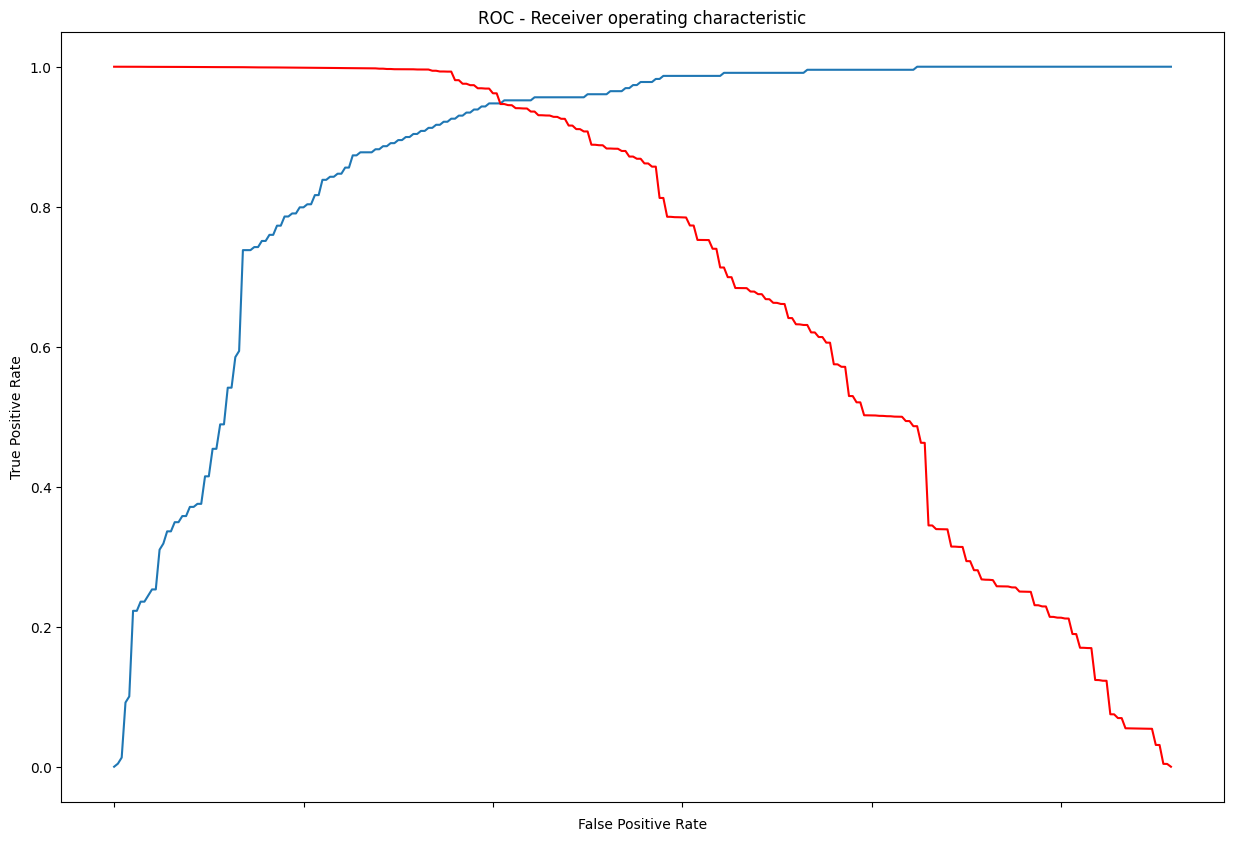

In [34]:
#Plotting ROC(AUC) - Train

fig, ax = plt.subplots()
plt.plot(roc_train["tpr"])
plt.plot(roc_train["1-fpr"], color = "red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Receiver operating characteristic")
ax.set_xticklabels([]);
plt.gcf().set_size_inches(15, 10)

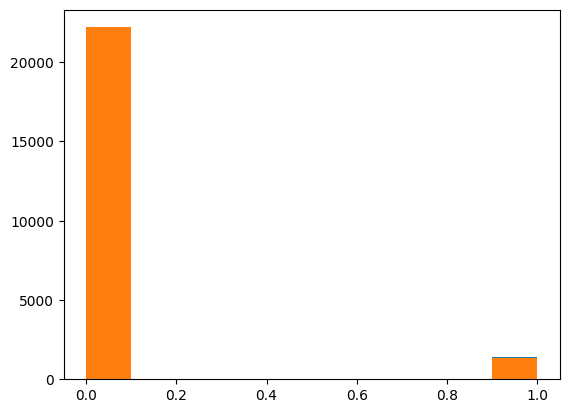

In [43]:
#Adjusting the cutoff 

cutoff = 0.007

plt.hist(y_pred_train)
plt.hist(y_pred_test);

Must evaluate this, this hist is not good 

In [36]:
#Pre processing for the cmatrix - data must be binary 

y_pred_train_bin = y_pred_train
y_pred_test_bin = y_pred_test

#Function to transform all prob from train 

for score in range(0,len(y_pred_train-1)):
    if y_pred_train.iloc[score] >= cutoff:
        y_pred_train_bin.iloc[score] = 1
    else:
        y_pred_train_bin.iloc[score] = 0

#Function to transform all prob from test 

for score in range(0,len(y_pred_test-1)):
    if y_pred_test.iloc[score] >= cutoff:
        y_pred_test_bin.iloc[score] = 1
    else:
        y_pred_test_bin.iloc[score] = 0


In [37]:
from sklearn.metrics import classification_report

print("Train Evaluation")
print(confusion_matrix(y_train, y_pred_train_bin))
print(classification_report(y_train,y_pred_train_bin))
print("##############################################")
print()
print("Test Evaluation")
print(confusion_matrix(y_test, y_pred_test_bin))
print(classification_report(y_test,y_pred_test_bin))
print("##############################################")

Train Evaluation
[[22128  1201]
 [   12   217]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23329
           1       0.15      0.95      0.26       229

    accuracy                           0.95     23558
   macro avg       0.58      0.95      0.62     23558
weighted avg       0.99      0.95      0.97     23558

##############################################

Test Evaluation
[[22187  1151]
 [    9   211]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23338
           1       0.15      0.96      0.27       220

    accuracy                           0.95     23558
   macro avg       0.58      0.95      0.62     23558
weighted avg       0.99      0.95      0.97     23558

##############################################
